In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Fdata = pd.read_csv('fishdata.csv')
Fdata_LD = Fdata
Fdata_LD.drop(Fdata_LD[Fdata_LD['Month'] < 0].index, inplace = True)
Fdata_LD.drop(Fdata_LD[Fdata_LD['Month'] > 12].index, inplace = True)
Fdata_LD.drop(Fdata_LD[Fdata_LD['external temperature'] <20].index, inplace = True)
Fdata_LD.drop(Fdata_LD[Fdata_LD['external temperature'] >40].index, inplace = True)
Fdata_LD['external temperature'].fillna(Fdata_LD['external temperature'].mean())
Fdata_LD.drop(Fdata_LD[Fdata_LD['internal temperature'] >40].index, inplace = True)
Fdata_LD.drop(Fdata_LD[Fdata_LD['internal temperature'] <20].index, inplace = True)
Fdata_LD['internal temperature'].fillna(Fdata_LD['external temperature'].mean())
Fdata_LD.dropna(inplace=True)
Fdata_LD.describe()

,Month,Day,Hour,Minute,Second,Carbon Monoxide,external temperature,PM 2.5,humidity,internal temperature,ignore
count,62976.000000,62976.000000,62976.000000,62976.000000,62976.000000,62976.000000,62976.000000,62976.000000,62976.0,62976.000000,62976.000000
mean,6.944884,20.253620,11.085826,29.925670,29.547193,189.542381,29.696916,29.729246,95.0,27.401541,94.393842
std,0.492447,6.671838,3.461004,17.274746,17.323263,25.126071,7.017501,1.087300,0.0,1.123446,1748.268398
min,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,20.000000,27.000000,95.0,25.370000,3.202000
25%,7.000000,16.000000,8.000000,15.000000,14.000000,177.000000,22.000000,29.000000,95.0,26.620000,3.880000
50%,7.000000,19.000000,11.000000,30.000000,29.000000,190.000000,31.000000,30.000000,95.0,27.250000,3.960000
75%,7.000000,24.000000,14.000000,45.000000,45.000000,201.000000,36.000000,30.000000,95.0,27.810000,4.130000
max,8.000000,30.000000,19.000000,59.000000,59.000000,255.000000,40.000000,35.000000,95.0,31.870000,42020.000000


In [4]:
Fdata_LD[:].isnull().sum()

Month                   0
Day                     0
Hour                    0
Minute                  0
Second                  0
Carbon Monoxide         0
external temperature    0
PM 2.5                  0
humidity                0
internal temperature    0
ignore                  0
dtype: int64

In [5]:
Fdata_LD=Fdata_LD.reset_index(drop=True)
Fdata_LD

,Month,Day,Hour,Minute,Second,Carbon Monoxide,external temperature,PM 2.5,humidity,internal temperature,ignore
0,6.0,18.0,14.0,30.0,43.0,201.0,25.0,29.0,95.0,27.19,4.39
1,6.0,18.0,14.0,30.0,48.0,201.0,25.0,29.0,95.0,27.19,4.38
2,6.0,18.0,14.0,31.0,3.0,201.0,25.0,29.0,95.0,27.19,4.38
3,6.0,18.0,14.0,31.0,8.0,201.0,25.0,29.0,95.0,27.19,4.41
4,6.0,18.0,14.0,31.0,13.0,201.0,25.0,29.0,95.0,27.25,4.41
...,...,...,...,...,...,...,...,...,...,...,...
62971,8.0,14.0,11.0,13.0,2.0,211.0,35.0,30.0,95.0,26.81,4.15
62972,8.0,14.0,11.0,13.0,6.0,211.0,35.0,30.0,95.0,26.87,4.16
62973,8.0,14.0,11.0,13.0,11.0,211.0,34.0,30.0,95.0,26.87,4.15
62974,8.0,14.0,11.0,13.0,16.0,0.0,35.0,30.0,95.0,26.87,4.16


In [6]:
FISHSCATTER = pd.DataFrame()
FISHSCATTER['external temperature'] = Fdata_LD['external temperature']
FISHSCATTER['humidity'] = Fdata_LD['humidity']
FISHSCATTER

,external temperature,humidity
0,25.0,95.0
1,25.0,95.0
2,25.0,95.0
3,25.0,95.0
4,25.0,95.0
...,...,...
62971,35.0,95.0
62972,35.0,95.0
62973,34.0,95.0
62974,35.0,95.0


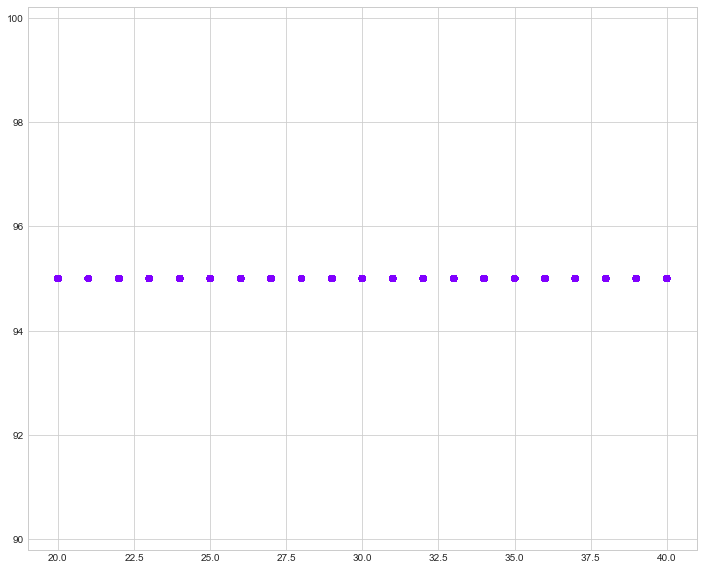

In [7]:
from sklearn.cluster import MeanShift
model = MeanShift(bandwidth=10)
model.fit(FISHSCATTER)
pred = model.fit_predict(FISHSCATTER)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(FISHSCATTER["external temperature"], FISHSCATTER["humidity"], c=pred, cmap='rainbow', alpha=0.9)
plt.show()

In [80]:
scayline = Fdata_LD['external temperature']
scaxline = Fdata_LD['internal temperature']
scazline = Fdata_LD['humidity']

zline = pd.DataFrame()
yline= Fdata_LD['external temperature']
xline= Fdata_LD['internal temperature']
zline['pos']= Fdata_LD.index
zline['humidity']= Fdata_LD['humidity']

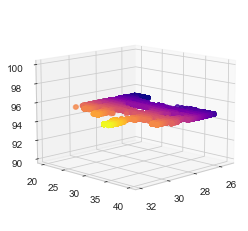

In [79]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.view_init(12, 45)
ax.scatter3D(scaxline, scayline, scazline, c=scaxline, cmap='plasma');

TypeError: Input z must be 2D, not 0D

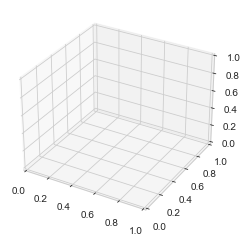

In [74]:
#still no idea how to fix
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xline, yline, zline, cmap='winter')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

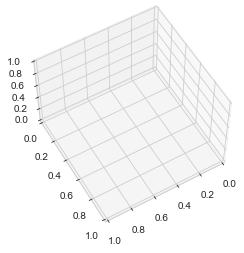

In [81]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(55, 60)
ax.plot_wireframe(xline, yline, zline, color='blue')